# Lead Scoring Case Study


In [1076]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [1077]:
# Importing required packages
import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics

## Step1: Reading and understanding Data

In [1078]:
#Importing Lead score data
leads_data = pd.read_csv("Leads.csv")
leads_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [1079]:
#checking dimensions of the data
leads_data.shape

(9240, 37)

In [1080]:
# Checking the info for the dataframe
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1081]:
#Checking the target variable in terms of percentage
leads_data.Converted.value_counts(normalize = True)*100

0    61.461039
1    38.538961
Name: Converted, dtype: float64

Around 40% of the leads have converted

In [1082]:
# check duplicates
leads_data[leads_data.duplicated()]

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Lead Quality, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

[0 rows x 37 columns]

No duplicates

In [1083]:
# There are many null values. Lets take a count
leads_data.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [1084]:
# Many of the categoric columns have the value 'Select' in it like below
# This is probably when the user did not select anything from the drop down.
# This is same as an empty or null value.
leads_data[['Lead Profile', 'City']].head()

Lead Profile    City
0          Select  Select
1          Select  Select
2  Potential Lead  Mumbai
3          Select  Mumbai
4          Select  Mumbai

In [1085]:
# Lets replace all 'Select' with NaN so that its easier to analyse and handle
leads_data = leads_data.replace({'Select':np.NaN})

In [1086]:
# Lets take a null count again
leads_data.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [1087]:
# To get a better understanding, lets view the missing value count in percentage rounded to 2
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [1088]:
# Many of these have a lot of null values. Lets look at the available values for the bigger gaps including nulls
# Checking 'Country'
leads_data['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

Most of the value is 'India'. Other values comprise only a small set.
We will mark this for deletion

In [1089]:
#Checking Specialization
leads_data['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Most are null. We will mark this for deletion

In [1090]:
#Checking 'How did you hear about X Education'
leads_data['How did you hear about X Education'].value_counts(dropna=False)

NaN                      7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

Most are null. We will mark this for deletion

In [1091]:
#Checking 'What is your current occupation '
leads_data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [1092]:
# Lets fill the NaN with 'Other'
leads_data['What is your current occupation'].fillna('Other', inplace=True)

In [1093]:
#Checking 'What matters most to you in choosing a course'
leads_data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Most of the values are 'Better Career Prospects' and others are mostly NaN. Will delete this column 

In [1094]:
#Checking 'Tags'
leads_data['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

Null has the most count. Also, this values are not difinite. Tags can be a choice of many. 
Will mark this column for deletion

In [1095]:
#Checking 'Lead Quality'
leads_data['Lead Quality'].value_counts(dropna=False)

NaN                  4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [1096]:
# Lead quality seems like a useful feature. So, we will not delete it
# Will fill the nulls with 'Not Sure' as this seems like a neutral value
leads_data['Lead Quality'].fillna('Not Sure', inplace=True)

In [1097]:
#Checking 'Lead Profile'
leads_data['Lead Profile'].value_counts(dropna=False)

NaN                            6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [1098]:
# Lead profile seems like a useful feature. So, we will not delete it
# Will fill the nulls with 'Other Leads' as this seems like a neutral value
leads_data['Lead Profile'].fillna('Other Leads', inplace=True)

In [1099]:
#Checking 'City'
leads_data['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

Most of the values are null. Many options are similar which says 'other cities'. Mark this for deletion

In [1100]:
# Checking Activity and Profilew index and sccore
leads_data[['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Asymmetrique Activity Index  5022 non-null   object 
 1   Asymmetrique Profile Index   5022 non-null   object 
 2   Asymmetrique Activity Score  5022 non-null   float64
 3   Asymmetrique Profile Score   5022 non-null   float64
dtypes: float64(2), object(2)
memory usage: 288.9+ KB


About half of the values are null and null count is same. Means they are missing at the same time

In [1101]:
leads_data[['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']]

Asymmetrique Activity Index Asymmetrique Profile Index  \
0                      02.Medium                  02.Medium   
1                      02.Medium                  02.Medium   
2                      02.Medium                    01.High   
3                      02.Medium                    01.High   
4                      02.Medium                    01.High   
...                          ...                        ...   
9235                   02.Medium                    01.High   
9236                   02.Medium                    01.High   
9237                   02.Medium                    01.High   
9238                   02.Medium                  02.Medium   
9239                   02.Medium                    01.High   

      Asymmetrique Activity Score  Asymmetrique Profile Score  
0                            15.0                        15.0  
1                            15.0                        15.0  
2                            14.0                        20.0  
3                            13.0                        17.0  
4                            15.0                        18.0  
...                           ...                         ...  
9235                         15.0                        17.0  
9236                         14.0                        19.0  
9237                         13.0                        20.0  
9238                         15.0                        16.0  
9239                         15.0                        18.0  

[9240 rows x 4 columns]

Activity Index and Profile Index are derived from the Activity Score and Profile Score.
Almost half of the values are null. We will remove these 4 columns

In [1102]:
# Removing columns marked for deletion
leads_data.drop(['Country', 'Specialization', 'How did you hear about X Education', 'What matters most to you in choosing a course', 'Tags', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1, inplace=True)

In [1103]:
# Checking missing value percentage again
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Lead Quality        

In [1104]:
# Removing the rows for which we have few null values. The number or such rows are low.
leads_data = leads_data.dropna()

In [1105]:
# Checking missing value percentage again
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Lead Quality                            

In [1106]:
# No more missing values
# checking how many records remain
leads_data.shape

(9074, 27)

In [1107]:
#checking numeric fields
leads_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9074.000000  9074.000000  9074.000000                  9074.000000   
mean   617032.619352     0.378554     3.456028                   482.887481   
std     23348.029512     0.485053     4.858802                   545.256560   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596406.000000     0.000000     1.000000                    11.000000   
50%    615278.500000     0.000000     3.000000                   246.000000   
75%    637176.500000     1.000000     5.000000                   922.750000   
90%    650276.800000     1.000000     7.000000                  1373.000000   
95%    655344.450000     1.000000    10.000000                  1557.000000   
99%    659563.350000     1.000000    17.000000                  1839.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9074.000000  
mean               2.370151  
std                2.160871  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.200000  
90%                5.000000  
95%                6.000000  
99%                9.000000  
max               55.000000

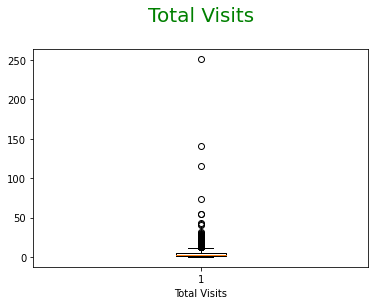

In [1108]:
# Looks like we have few outliers for TotalVisits and Page Views Per Visit
# Lets check via boxplot
plt.boxplot(leads_data['TotalVisits'])
plt.title('Total Visits\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel('Total Visits')
plt.show()

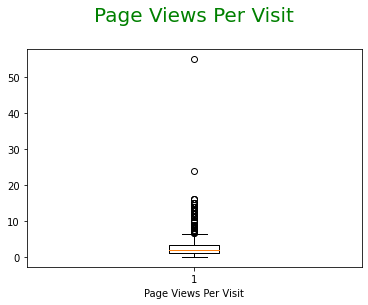

In [1109]:
# box plot for 'Page Views Per Visit'
plt.boxplot(leads_data['Page Views Per Visit'])
plt.title('Page Views Per Visit\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel('Page Views Per Visit')
plt.show()

In [1110]:
# removing (statistical) outliers with the help of IQR
# treating outliers for 'TotalVisits'
Q1 = leads_data['TotalVisits'].quantile(0.05)
Q3 = leads_data['TotalVisits'].quantile(0.95)
IQR = Q3 - Q1
leads_data = leads_data[(leads_data['TotalVisits'] >= Q1 - 1.5*IQR) & (leads_data['TotalVisits'] <= Q3 + 1.5*IQR)]



In [1111]:
# treating outliers for 'Page Views Per Visit'
Q1 = leads_data['Page Views Per Visit'].quantile(0.05)
Q3 = leads_data['Page Views Per Visit'].quantile(0.95)
IQR = Q3 - Q1
leads_data = leads_data[(leads_data['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads_data['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

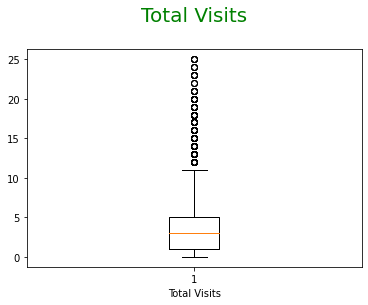

In [1112]:
# Lets check boxplot for TotalVisits again
plt.boxplot(leads_data['TotalVisits'])
plt.title('Total Visits\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel('Total Visits')
plt.show()

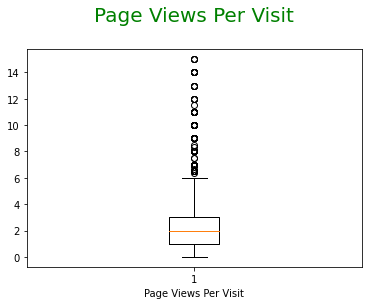

In [1113]:
# Lets check boxplot for 'Page Views Per Visit' again
plt.boxplot(leads_data['Page Views Per Visit'])
plt.title('Page Views Per Visit\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel('Page Views Per Visit')
plt.show()

In [1114]:
# checking how many records remain
leads_data.shape

(9048, 27)

In [1115]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9048 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9048 non-null   object 
 1   Lead Number                               9048 non-null   int64  
 2   Lead Origin                               9048 non-null   object 
 3   Lead Source                               9048 non-null   object 
 4   Do Not Email                              9048 non-null   object 
 5   Do Not Call                               9048 non-null   object 
 6   Converted                                 9048 non-null   int64  
 7   TotalVisits                               9048 non-null   float64
 8   Total Time Spent on Website               9048 non-null   int64  
 9   Page Views Per Visit                      9048 non-null   float64
 10  Last Activity                       

## Step 2: Exploratory Data Analysis- Visualisation

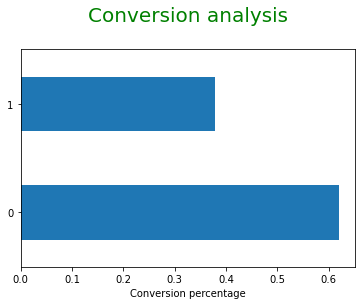

In [1116]:
# Checking the spread of target variable
leads_data.Converted.value_counts(normalize=True).plot.barh()
plt.title('Conversion analysis\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel('Conversion percentage')
plt.show()

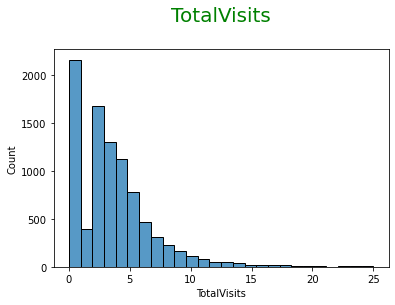

In [1117]:
#histplot for TotalVisits
sns.histplot(leads_data['TotalVisits'], bins=len(leads_data['TotalVisits'].unique()))
plt.title('TotalVisits\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel('TotalVisits')
plt.show()

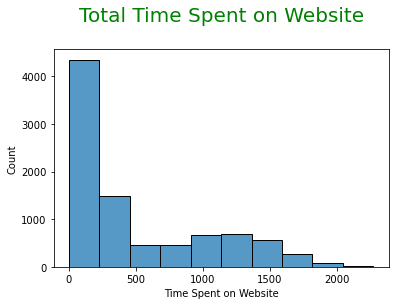

In [1118]:
#histplot for Total Time Spent on Website
sns.histplot(leads_data['Total Time Spent on Website'], bins=10)
plt.title('Total Time Spent on Website\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel('Time Spent on Website')
plt.show()

<AxesSubplot:xlabel='Converted'>

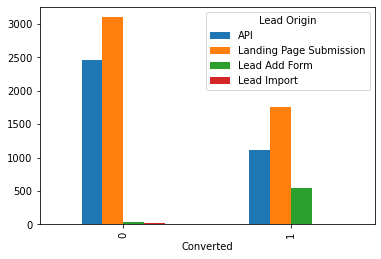

In [1119]:
# Analysing Lead Origin
pd.pivot_table(data=leads_data, index='Converted', columns='Lead Origin', values='Prospect ID', aggfunc='count').plot.bar()


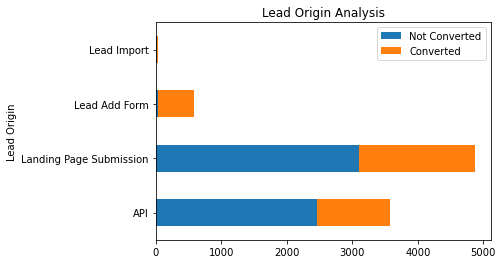

In [1120]:
#To get a better understanding lets do a stacked bar plot
res_ed=pd.pivot_table(data=leads_data, index='Lead Origin', columns='Converted', values='Prospect ID', aggfunc='count')
res_ed[[0, 1]].plot(kind = 'barh', stacked = True, title = 'Lead Origin Analysis')
plt.legend(["Not Converted", "Converted"], loc='upper right')
plt.show()

Lead Add Form has mostly converted

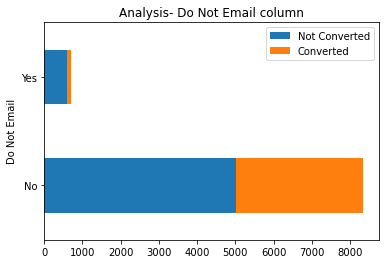

In [1121]:
# Checking the 'Do Not Email' column
res_ed2=pd.pivot_table(data=leads_data, index='Do Not Email', columns='Converted', values='Prospect ID', aggfunc='count')
res_ed2[[0, 1]].plot(kind = 'barh', stacked = True, title = 'Analysis- Do Not Email column')
plt.legend(["Not Converted", "Converted"], loc='upper right')
plt.show()

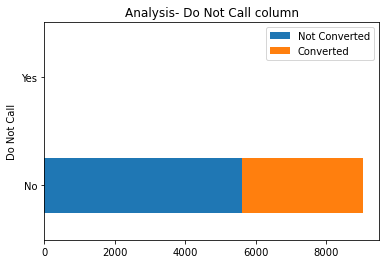

In [1122]:
# Checking the 'Do Not Call' column
res_ed3=pd.pivot_table(data=leads_data, index='Do Not Call', columns='Converted', values='Prospect ID', aggfunc='count')
res_ed3[[0, 1]].plot(kind = 'barh', stacked = True, title = 'Analysis- Do Not Call column')
plt.legend(["Not Converted", "Converted"], loc='upper right')
plt.show()

Leads have converted even if they have suggested to not email and call

<Figure size 1080x720 with 0 Axes>

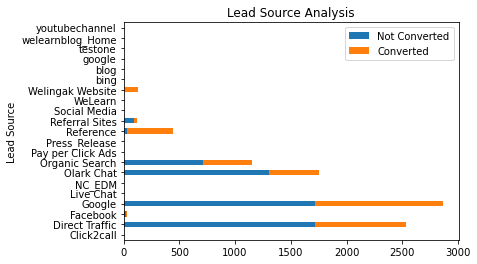

In [1123]:
#Lead Source Analysis
plt.figure(figsize=(15, 10))
res_ed4=pd.pivot_table(data=leads_data, index='Lead Source', columns='Converted', values='Prospect ID', aggfunc='count')
res_ed4[[0, 1]].plot(kind = 'barh', stacked = True, title = 'Lead Source Analysis')
plt.legend(["Not Converted", "Converted"], loc='upper right')
plt.show()

Leads through references and Welingak website have mostly converted

<Figure size 1080x720 with 0 Axes>

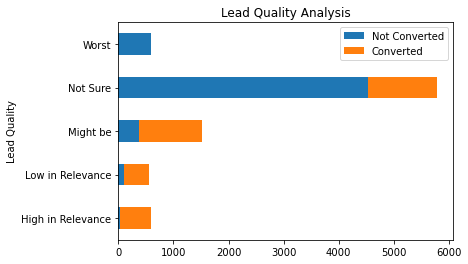

In [1124]:
#Lead Quality Analysis
plt.figure(figsize=(15, 10))
res_ed5=pd.pivot_table(data=leads_data, index='Lead Quality', columns='Converted', values='Prospect ID', aggfunc='count')
res_ed5[[0, 1]].plot(kind = 'barh', stacked = True, title = 'Lead Quality Analysis')
plt.legend(["Not Converted", "Converted"], loc='upper right')
plt.show()

Leads that have any relevance mentioned have mostly converted

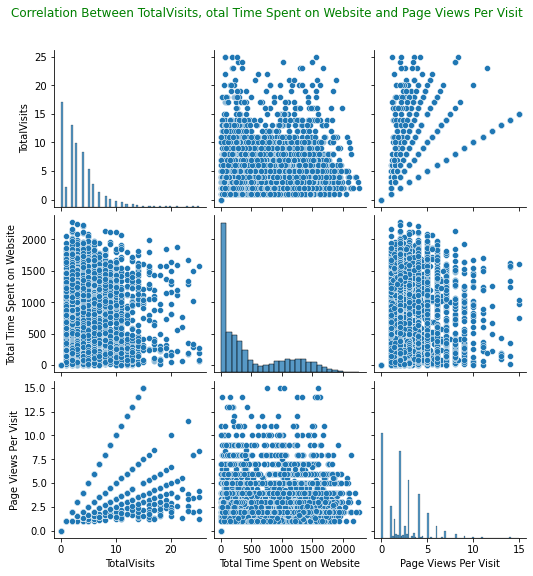

In [1125]:
# Pairplot between 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit' which seem to be related
pp=sns.pairplot(leads_data[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
pp.fig.suptitle("Correlation Between TotalVisits, otal Time Spent on Website and Page Views Per Visit", y=1.06, color='Green')
plt.show()

Seems to have high correlation between TotalVisits and Page Views Per Visit

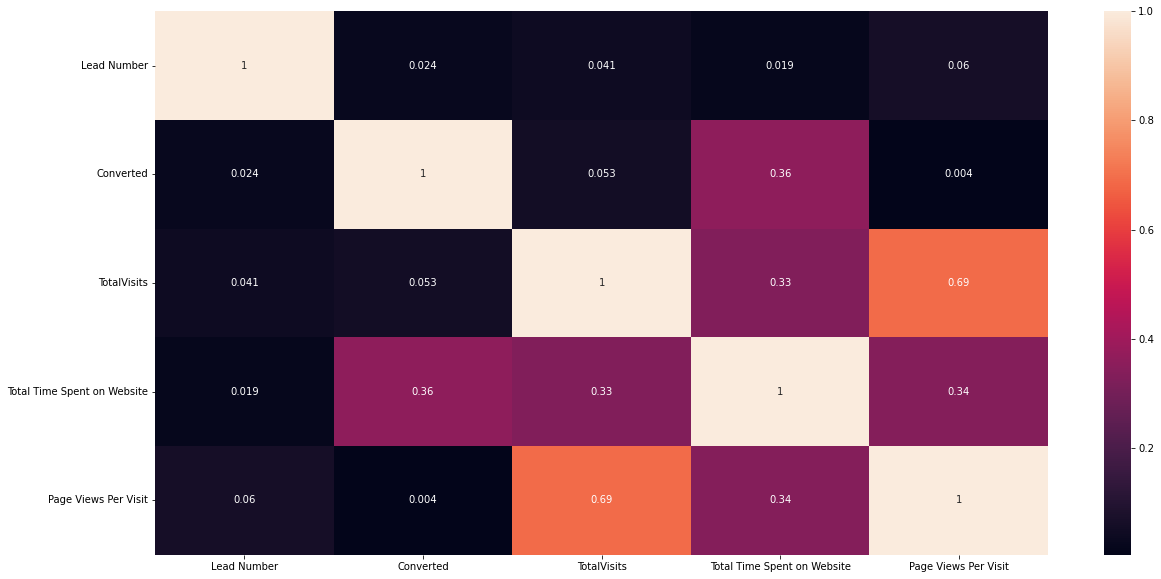

In [1126]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leads_data.corr(),annot = True)
plt.show()

As seen earlier, there is good correlation between TotalVisits and Page Views Per Visit
We will check this again later

## Step 3: Data Preparation

In [1127]:
leads_data.shape

(9048, 27)

In [1128]:
leads_data['Prospect ID'].value_counts().count()

9048

In [1129]:
leads_data['Lead Number'].value_counts().count()

9048

In [1130]:
# Both Prospect ID and Lead Number are unique columns for identification of record. We will keep Lead Number for reference.
# Removing 'Prospect ID'
leads_data.drop('Prospect ID', axis=1, inplace=True)

In [1131]:
# checking binary variables
leads_data[['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']]

Do Not Email Do Not Call Search Magazine Newspaper Article  \
0              No          No     No       No                No   
1              No          No     No       No                No   
2              No          No     No       No                No   
3              No          No     No       No                No   
4              No          No     No       No                No   
...           ...         ...    ...      ...               ...   
9235          Yes          No     No       No                No   
9236           No          No     No       No                No   
9237          Yes          No     No       No                No   
9238           No          No     No       No                No   
9239           No          No     No       No                No   

     X Education Forums Newspaper Digital Advertisement  \
0                    No        No                    No   
1                    No        No                    No   
2                    No        No                    No   
3                    No        No                    No   
4                    No        No                    No   
...                 ...       ...                   ...   
9235                 No        No                    No   
9236                 No        No                    No   
9237                 No        No                    No   
9238                 No        No                    No   
9239                 No        No                    No   

     Through Recommendations Receive More Updates About Our Courses  \
0                         No                                     No   
1                         No                                     No   
2                         No                                     No   
3                         No                                     No   
4                         No                                     No   
...                      ...                                    ...   
9235                      No                                     No   
9236                      No                                     No   
9237                      No                                     No   
9238                      No                                     No   
9239                      No                                     No   

     Update me on Supply Chain Content Get updates on DM Content  \
0                                   No                        No   
1                                   No                        No   
2                                   No                        No   
3                                   No                        No   
4                                   No                        No   
...                                ...                       ...   
9235                                No                        No   
9236                                No                        No   
9237                                No                        No   
9238                                No                        No   
9239                                No                        No   

     I agree to pay the amount through cheque  \
0                                          No   
1                                          No   
2                                          No   
3                                          No   
4                                          No   
...                                       ...   
9235                                       No   
9236                                       No   
9237                                       No   
9238                                       No   
9239                                       No   

     A free copy of Mastering The Interview  
0                                        No  
1                                        No  
2                                       Yes  
3                                        No  
4 

In [1132]:
# Checking values of columns with 'Yes'/ 'No' values
for col in ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']:
        print(col) 
        print('-----------')
        print(leads_data[col].value_counts())
        print()

Do Not Email
-----------
No     8342
Yes     706
Name: Do Not Email, dtype: int64

Do Not Call
-----------
No     9046
Yes       2
Name: Do Not Call, dtype: int64

Search
-----------
No     9034
Yes      14
Name: Search, dtype: int64

Magazine
-----------
No    9048
Name: Magazine, dtype: int64

Newspaper Article
-----------
No     9046
Yes       2
Name: Newspaper Article, dtype: int64

X Education Forums
-----------
No     9047
Yes       1
Name: X Education Forums, dtype: int64

Newspaper
-----------
No     9047
Yes       1
Name: Newspaper, dtype: int64

Digital Advertisement
-----------
No     9044
Yes       4
Name: Digital Advertisement, dtype: int64

Through Recommendations
-----------
No     9041
Yes       7
Name: Through Recommendations, dtype: int64

Receive More Updates About Our Courses
-----------
No    9048
Name: Receive More Updates About Our Courses, dtype: int64

Update me on Supply Chain Content
-----------
No    9048
Name: Update me on Supply Chain Content, dtype: int64

Some of the columns have zero variance. They have only 1 value. So, removing them as it will not contribute anything to the model.

In [1133]:
# Removing columns with only one value
leads_data = leads_data.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)
leads_data.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0          No          0          0.0                            0   
1          No          0          5.0                          674   
2          No          1          2.0                         1532   
3          No          0          1.0                          305   
4          No          1          2.0                         1428   

   Page Views Per Visit            Last Activity  ... Search  \
0                   0.0  Page Visited on Website  ...     No   
1                   2.5             Email Opened  ...     No   
2                   2.0             Email Opened  ...     No   
3                   1.0              Unreachable  ...     No   
4                   1.0        Converted to Lead  ...     No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations      Lead Quality    Lead Profile  \
0                      No  Low in Relevance     Other Leads   
1                      No          Not Sure     Other Leads   
2                      No          Might be  Potential Lead   
3                      No          Not Sure     Other Leads   
4                      No          Might be     Other Leads   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 21 columns]

#### Converting other binary variables (Yes/No) to 0/1

In [1134]:
# List of variables to map

collist =  ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_data[collist] = leads_data[collist].apply(binary_map)

In [1135]:
leads_data[['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']]

Do Not Email  Do Not Call  Search  Newspaper Article  \
0                0            0       0                  0   
1                0            0       0                  0   
2                0            0       0                  0   
3                0            0       0                  0   
4                0            0       0                  0   
...            ...          ...     ...                ...   
9235             1            0       0                  0   
9236             0            0       0                  0   
9237             1            0       0                  0   
9238             0            0       0                  0   
9239             0            0       0                  0   

      X Education Forums  Newspaper  Digital Advertisement  \
0                      0          0                      0   
1                      0          0                      0   
2                      0          0                      0   
3                      0          0                      0   
4                      0          0                      0   
...                  ...        ...                    ...   
9235                   0          0                      0   
9236                   0          0                      0   
9237                   0          0                      0   
9238                   0          0                      0   
9239                   0          0                      0   

      Through Recommendations  A free copy of Mastering The Interview  
0                           0                                       0  
1                           0                                       0  
2                           0                                       1  
3                           0                                       0  
4                           0                                       0  
...                       ...                                     ...  
9235                        0                                       0  
9236                        0                                       1  
9237                        0                                       1  
9238                        0                                       0  
9239                        0                                       1  

[9048 rows x 9 columns]

In [1136]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9048 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9048 non-null   int64  
 1   Lead Origin                             9048 non-null   object 
 2   Lead Source                             9048 non-null   object 
 3   Do Not Email                            9048 non-null   int64  
 4   Do Not Call                             9048 non-null   int64  
 5   Converted                               9048 non-null   int64  
 6   TotalVisits                             9048 non-null   float64
 7   Total Time Spent on Website             9048 non-null   int64  
 8   Page Views Per Visit                    9048 non-null   float64
 9   Last Activity                           9048 non-null   object 
 10  What is your current occupation         9048 non-null   obje

In [1137]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads_data[['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation', 'Lead Quality', 'Lead Profile', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads_data = pd.concat([leads_data, dummy1], axis=1)

In [1138]:
#Drop the object columns for which dummies are created
leads_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation', 'Lead Quality', 'Lead Profile', 'Last Notable Activity'], axis=1, inplace=True)

In [1139]:
leads_data.shape

(9048, 81)

In [1140]:
leads_data.head()

Lead Number  Do Not Email  Do Not Call  Converted  TotalVisits  \
0       660737             0            0          0          0.0   
1       660728             0            0          0          5.0   
2       660727             0            0          1          2.0   
3       660719             0            0          0          1.0   
4       660681             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  Search  \
0                            0                   0.0       0   
1                          674                   2.5       0   
2                         1532                   2.0       0   
3                          305                   1.0       0   
4                         1428                   1.0       0   

   Newspaper Article  X Education Forums  ...  \
0                  0                   0  ...   
1                  0                   0  ...   
2                  0                   0  ...   
3                  0                   0  ...   
4                  0                   0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

[5 rows x 81 columns]

In [1141]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9048 entries, 0 to 9239
Data columns (total 81 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           9048 non-null   int64  
 1   Do Not Email                                          9048 non-null   int64  
 2   Do Not Call                                           9048 non-null   int64  
 3   Converted                                             9048 non-null   int64  
 4   TotalVisits                                           9048 non-null   float64
 5   Total Time Spent on Website                           9048 non-null   int64  
 6   Page Views Per Visit                                  9048 non-null   float64
 7   Search                                                9048 non-null   int64  
 8   Newspaper Article                                     9048

## Step 4: Looking at Correlations

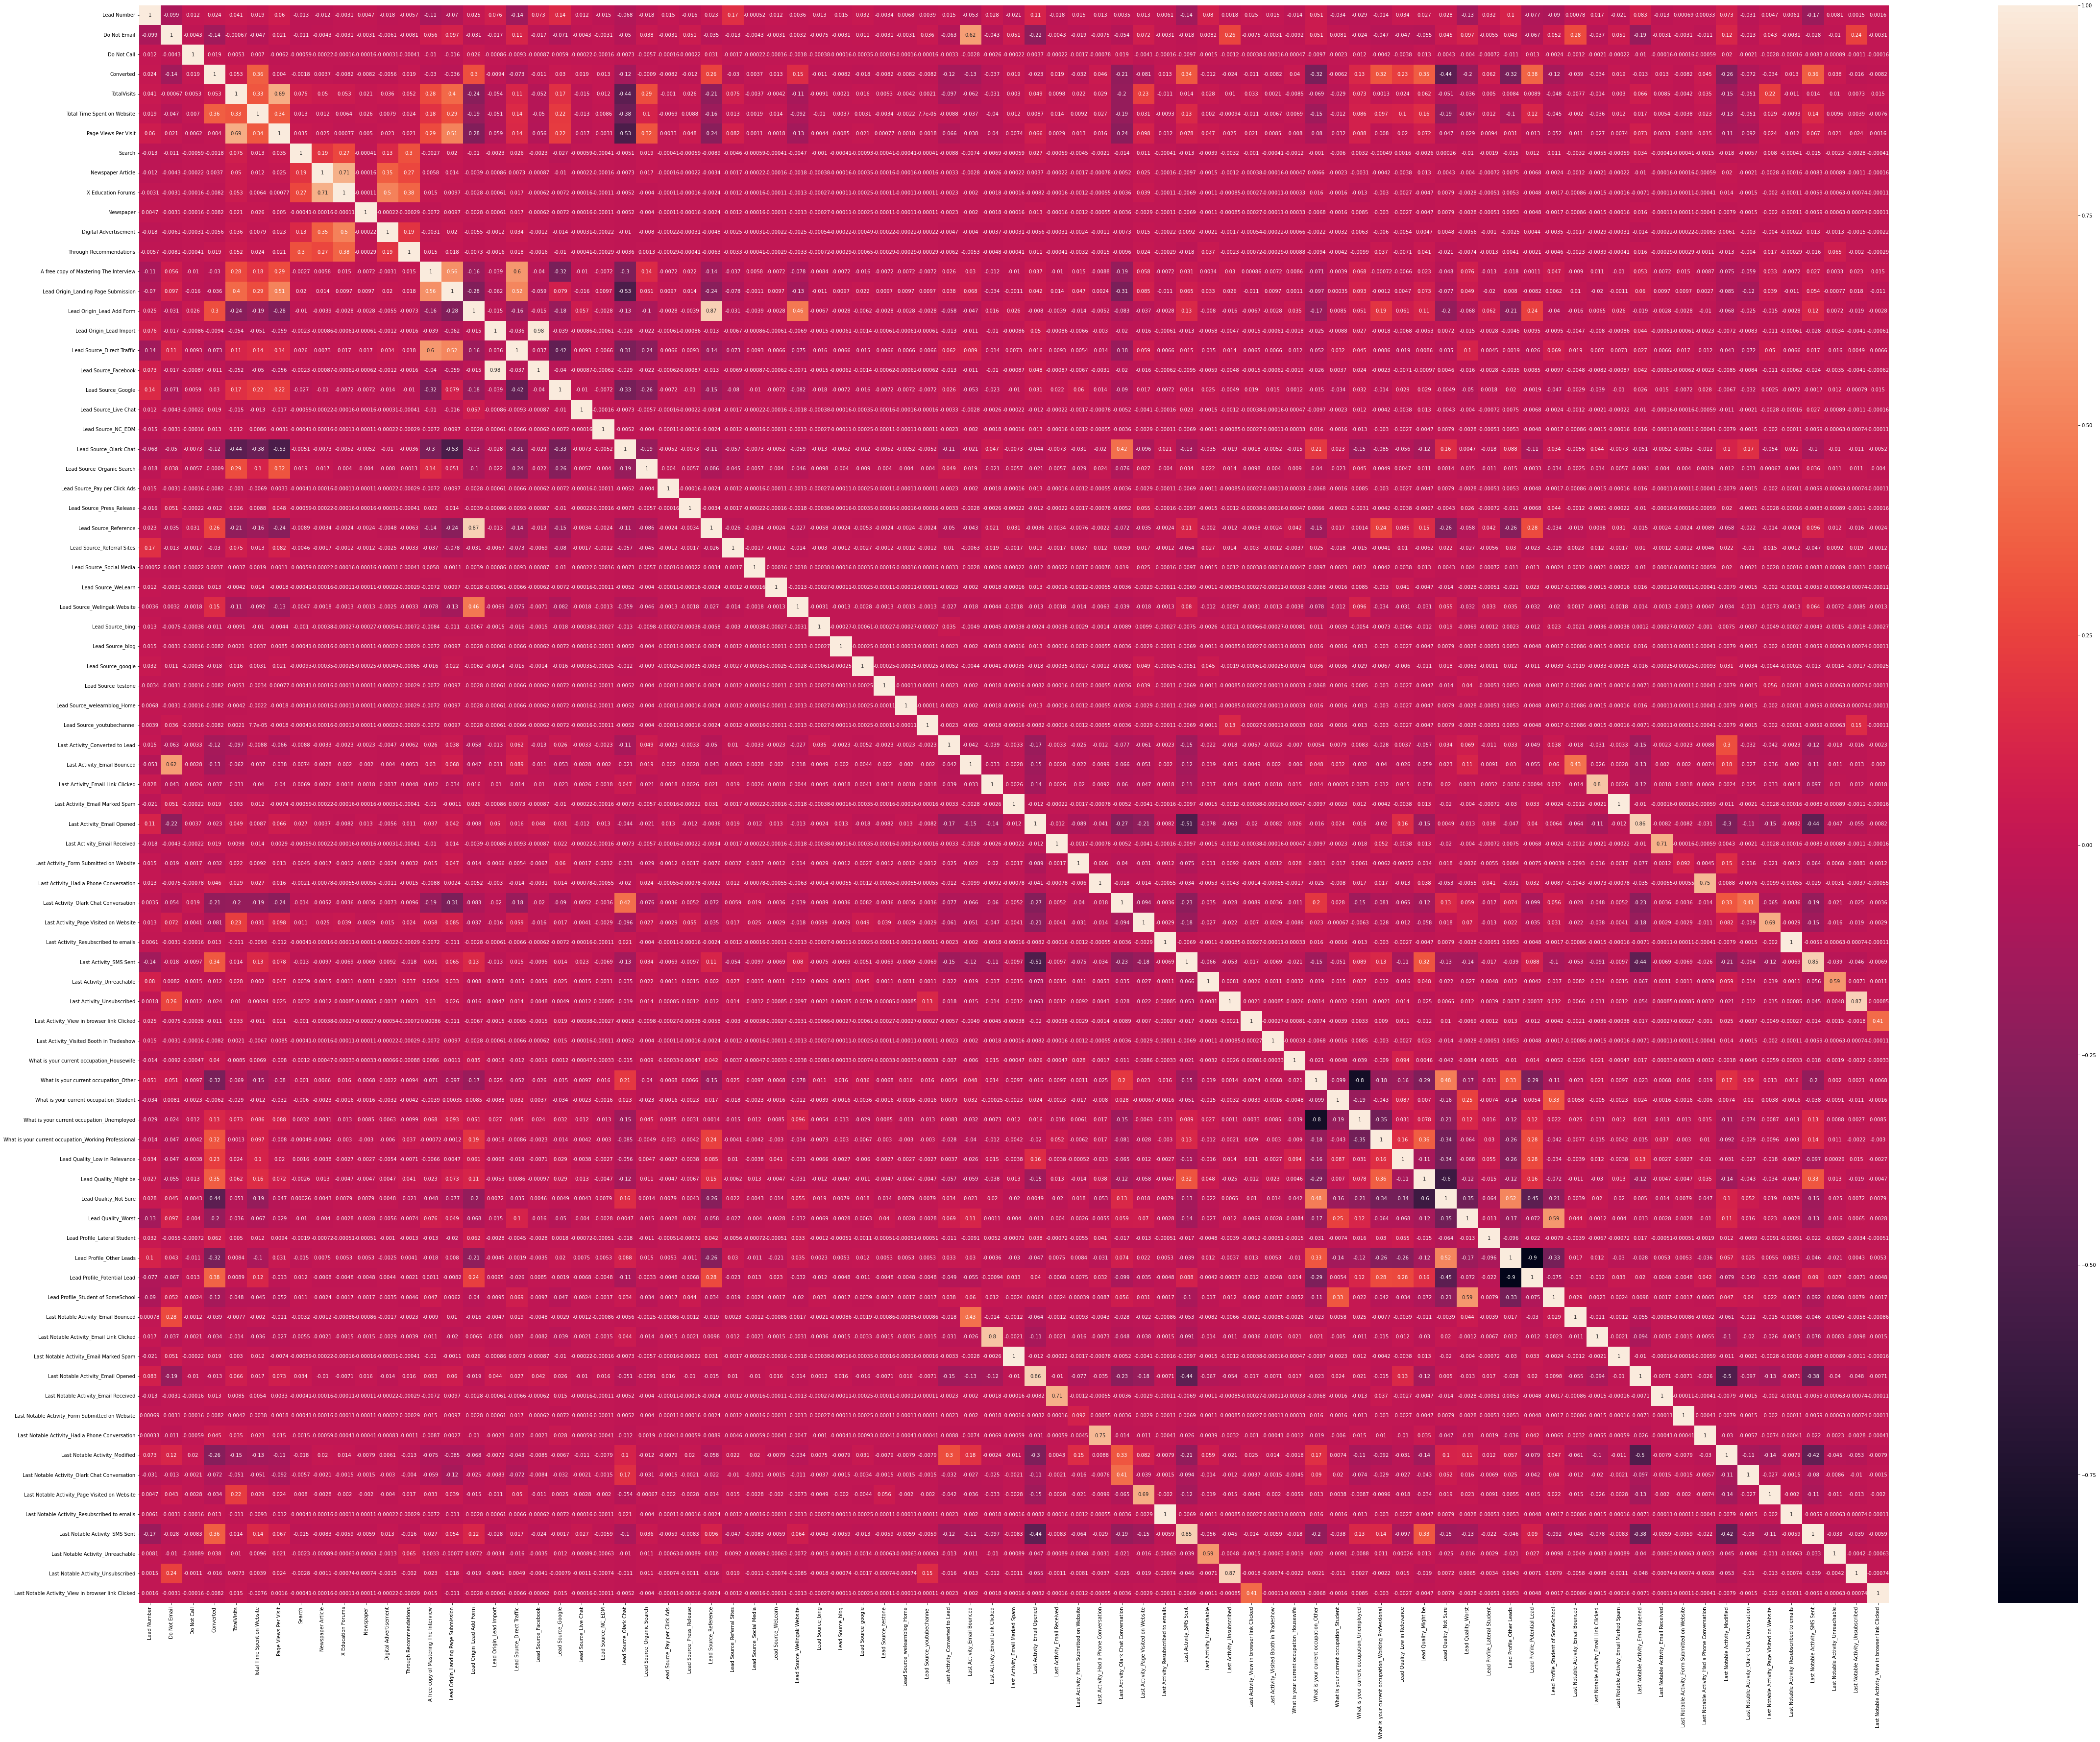

In [1142]:
# Let's see the correlation matrix 
plt.figure(figsize = (80,60))        # Size of the figure
sns.heatmap(leads_data.corr(),annot = True)
plt.show()

In [1143]:
# Removing few of the highly correlated fields from Last Activity and Last Notable Activity set
leads_data.drop(['Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Email Marked Spam', 'Last Notable Activity_Email Opened', 'Last Notable Activity_Email Received', 'Last Notable Activity_Had a Phone Conversation', 'Last Notable Activity_Page Visited on Website', 'Last Notable Activity_Resubscribed to emails', 'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed'], axis=1, inplace = True)

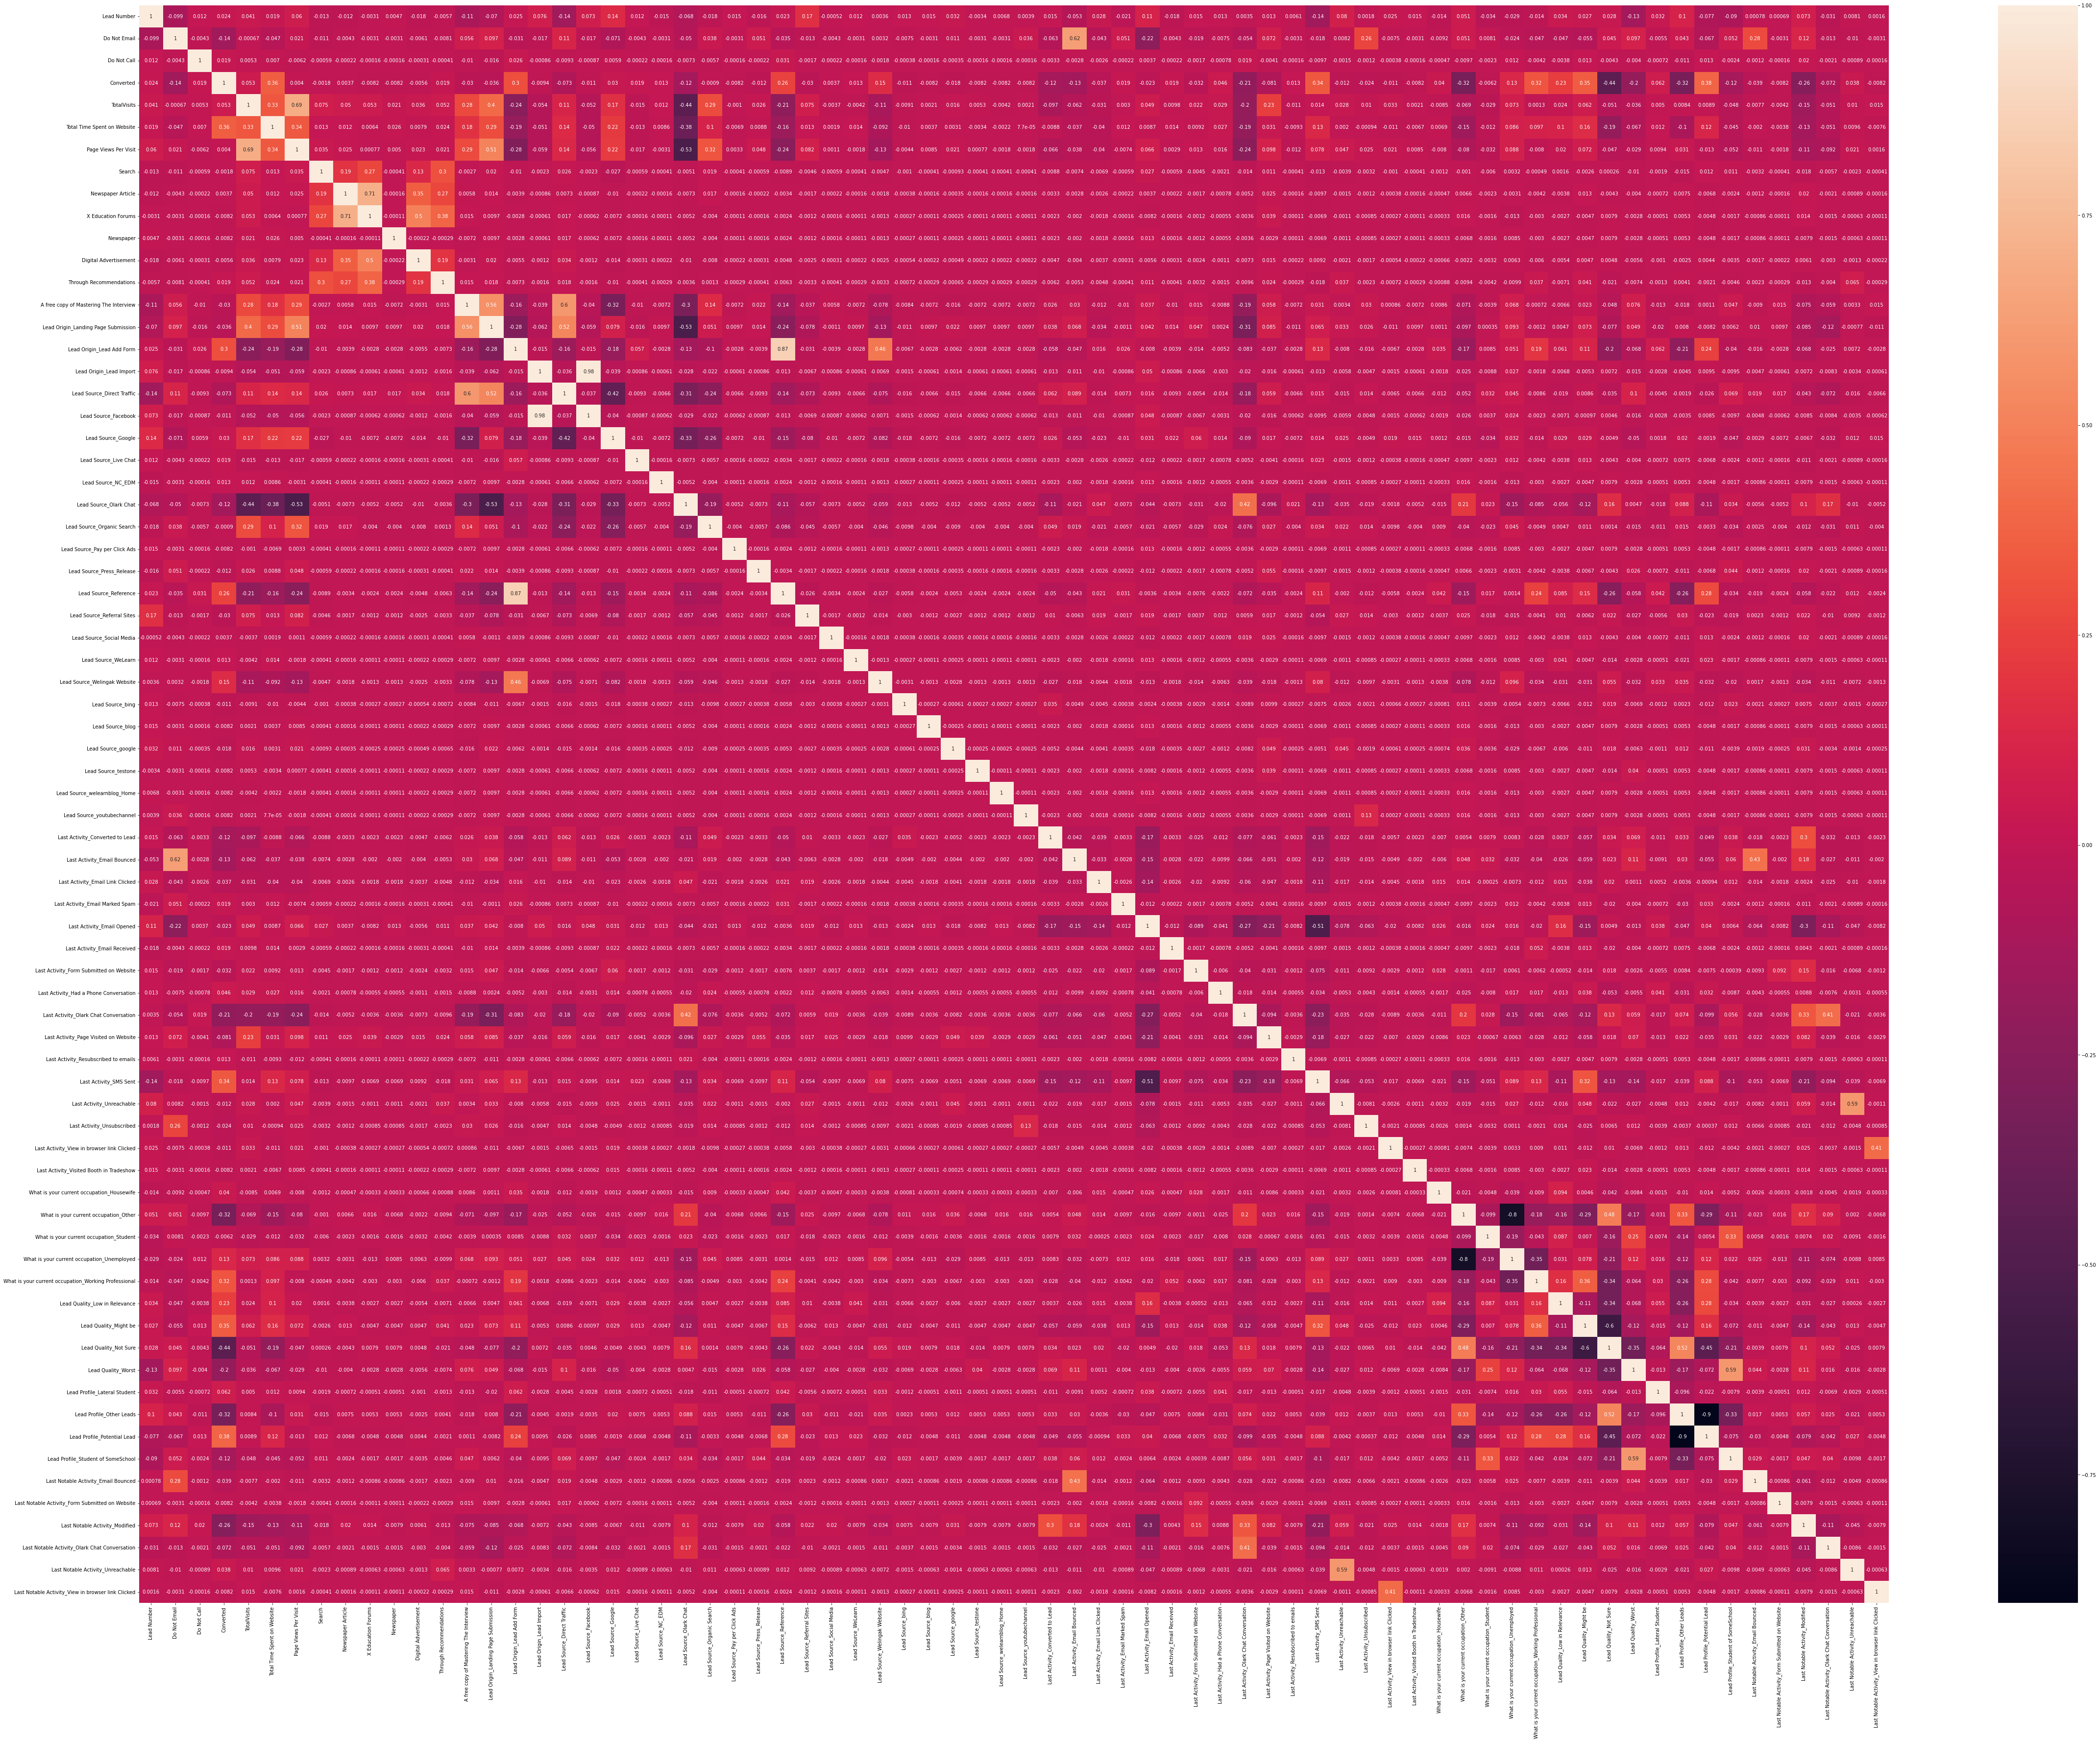

In [1144]:
# Let's see the correlation matrix again
plt.figure(figsize = (80,60))        # Size of the figure
sns.heatmap(leads_data.corr(),annot = True)
plt.show()

## Step 5: Test-Train Split

In [1145]:
# Putting feature variable to X without 'Lead Number' and target variable 
X = leads_data.drop(['Lead Number', 'Converted'], axis=1)

X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
0                   0.0       0                  0                   0   
1                   2.5       0                  0                   0   
2                   2.0       0                  0                   0   
3                   1.0       0                  0                   0   
4                   1.0       0                  0                   0   

   Newspaper  Digital Advertisement  ...  Lead Profile_Lateral Student  \
0          0                      0  ...                             0   
1          0                      0  ...                             0   
2          0                      0  ...                             0   
3          0                      0  ...                             0   
4          0                      0  ...                             0   

   Lead Profile_Other Leads  Lead Profile_Potential Lead  \
0                         1                            0   
1                         1                            0   
2                         0                            1   
3                         1                            0   
4                         1                            0   

   Lead Profile_Student of SomeSchool  Last Notable Activity_Email Bounced  \
0                                   0                                    0   
1                                   0                                    0   
2                                   0                                    0   
3                                   0                                    0   
4                                   0                                    0   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Unreachable  \
0                                  0   
1                                  0   
2                                  0   
3                                  0   
4                                  0   

   Last Notable Activity_View in browser link Clicked  
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

[5 rows x 70 columns]

In [1146]:
# Putting target variable to y
y = leads_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1147]:
# Splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


In [1148]:
X_train.shape

(6333, 70)

In [1149]:
X_test.shape

(2715, 70)

In [1150]:
X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
8425             0            0          0.0                            0   
8341             0            0          0.0                            0   
7376             0            0          2.0                          438   
7414             0            0          0.0                            0   
3521             0            0          5.0                         1136   

      Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
8425                   0.0       0                  0                   0   
8341                   0.0       0                  0                   0   
7376                   2.0       0                  0                   0   
7414                   0.0       0                  0                   0   
3521                   5.0       0                  0                   0   

      Newspaper  Digital Advertisement  ...  Lead Profile_Lateral Student  \
8425          0                      0  ...                             0   
8341          0                      0  ...                             0   
7376          0                      0  ...                             0   
7414          0                      0  ...                             0   
3521          0                      0  ...                             0   

      Lead Profile_Other Leads  Lead Profile_Potential Lead  \
8425                         1                            0   
8341                         1                            0   
7376                         1                            0   
7414                         0                            0   
3521                         1                            0   

      Lead Profile_Student of SomeSchool  Last Notable Activity_Email Bounced  \
8425                                   0                                    0   
8341                                   0                                    0   
7376                                   0                                    0   
7414                                   1                                    0   
3521                                   0                                    0   

      Last Notable Activity_Form Submitted on Website  \
8425                                                0   
8341                                                0   
7376                                                0   
7414                                                0   
3521                                                0   

      Last Notable Activity_Modified  \
8425                               0   
8341                               0   
7376                               0   
7414                               1   
3521                               0   

      Last Notable Activity_Olark Chat Conversation  \
8425                                              0   
8341                                              0   
7376                                              0   
7414                                              0   
3521                                              0   

      Last Notable Activity_Unreachable  \
8425                                  0   
8341                                  0   
7376                                  0   
7414                                  0   
3521                                  0   

      Last Notable Activity_View in browser link Clicked  
8425                                                  0   
8341                                                  0   
7376                                                  0   
7414                                                  0   
3521                                                  0   

[5 rows x 70 columns]

## Step 6: Feature Scaling

In [1151]:
# continuous variables have to be scaled before building the model
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe()

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  6333.000000                  6333.000000           6333.000000
mean      3.312174                   477.066161              2.336973
std       3.263096                   543.083086              2.039782
min       0.000000                     0.000000              0.000000
25%       1.000000                     9.000000              1.000000
50%       3.000000                   244.000000              2.000000
75%       5.000000                   904.000000              3.000000
max      25.000000                  2253.000000             15.000000

In [1152]:
# Using standard scaler
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
8425             0            0    -1.015121                    -0.878510   
8341             0            0    -1.015121                    -0.878510   
7376             0            0    -0.402157                    -0.071940   
7414             0            0    -1.015121                    -0.878510   
3521             0            0     0.517288                     1.213416   

      Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
8425             -1.145788       0                  0                   0   
8341             -1.145788       0                  0                   0   
7376             -0.165214       0                  0                   0   
7414             -1.145788       0                  0                   0   
3521              1.305648       0                  0                   0   

      Newspaper  Digital Advertisement  ...  Lead Profile_Lateral Student  \
8425          0                      0  ...                             0   
8341          0                      0  ...                             0   
7376          0                      0  ...                             0   
7414          0                      0  ...                             0   
3521          0                      0  ...                             0   

      Lead Profile_Other Leads  Lead Profile_Potential Lead  \
8425                         1                            0   
8341                         1                            0   
7376                         1                            0   
7414                         0                            0   
3521                         1                            0   

      Lead Profile_Student of SomeSchool  Last Notable Activity_Email Bounced  \
8425                                   0                                    0   
8341                                   0                                    0   
7376                                   0                                    0   
7414                                   1                                    0   
3521                                   0                                    0   

      Last Notable Activity_Form Submitted on Website  \
8425                                                0   
8341                                                0   
7376                                                0   
7414                                                0   
3521                                                0   

      Last Notable Activity_Modified  \
8425                               0   
8341                               0   
7376                               0   
7414                               1   
3521                               0   

      Last Notable Activity_Olark Chat Conversation  \
8425                                              0   
8341                                              0   
7376                                              0   
7414                                              0   
3521                                              0   

      Last Notable Activity_Unreachable  \
8425                                  0   
8341                                  0   
7376                                  0   
7414                                  0   
3521                                  0   

      Last Notable Activity_View in browser link Clicked  
8425                                                  0   
8341                                                  0   
7376                                                  0   
7414                                                  0   
3521                                                  0   

[5 rows x 70 columns]

In [1153]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe()

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  6.333000e+03                 6.333000e+03          6.333000e+03
mean  -5.140019e-17                 1.512203e-16          7.496153e-17
std    1.000079e+00                 1.000079e+00          1.000079e+00
min   -1.015121e+00                -8.785098e-01         -1.145788e+00
25%   -7.086390e-01                -8.619365e-01         -6.555006e-01
50%   -9.567570e-02                -4.291877e-01         -1.652135e-01
75%    5.172876e-01                 7.861919e-01          3.250736e-01
max    6.646921e+00                 3.270354e+00          6.208519e+00

## Step 7: Model Building

In [1154]:
# Logistic regression model1
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6265
Model Family:                Binomial   Df Model:                           67
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2075.1
Date:                Tue, 12 Jul 2022   Deviance:                       4150.1
Time:                        18:39:29   Pearson chi2:                 6.21e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   23.7459   1.24e+05      0.000      1.000   -2.43e+05    2.43e+05
Do Not Email                                            -1.0842      0.235     -4.606      0.000      -1.546      -0.623
Do Not Call                                             23.3160   5.58e+04      0.000      1.000   -1.09e+05    1.09e+05
TotalVisits                                              0.2566      0.056      4.569      0.000       0.147       0.367
Total Time Spent on Website                              1.0532      0.046     23.092      0.000       0.964       1.143
Page Views Per Visit                                    -0.2192      0.063     -3.467      0.001      -0.343      -0.095
Search                                                  -0.6594      1.110     -0.594      0.553      -2.835       1.516
Newspaper Article                                       24.7726   1.26e+05      0.000      1.000   -2.46e+05    2.46e+05
X Education Forums                                     -34.8581   1.09e+05     -0.000      1.000   -2.14e+05    2.14e+05
Newspaper                                              -25.9427   1.56e+05     -0.000      1.000   -3.06e+05    3.05e+05
Digital Advertisement                                  -34.8581   1.09e+05     -0.000      1.000   -2.14e+05    2.14e+05
Through Recommendations                                 22.1653   4.45e+04      0.000      1.000   -8.71e+04    8.72e+04
A free copy of Mastering The Interview                  -0.0190      0.123     -0.154      0.877      -0.260       0.222
Lead Origin_Landing Page Submission                     -0.3906      0.124     -3.143      0.002      -0.634      -0.147
Lead Origin_Lead Add Form                               22.9206   8.48e+04      0.000      1.000   -1.66e+05    1.66e+05
Lead Origin_Lead Import                                 26.8380   1.43e+05      0.000      1.000   -2.81e+05    2.81e+05
Lead Source_Direct Traffic                              23.3924   8.48e+04      0.000      1.000   -1.66e+05    1.66e+05
Lead Source_Facebook                                    -2.2717   1.66e+05  -1.36e-05      1.000   -3.26e+05    3.26e+05
Lead Source_Google                                      23.6459   8.48e+04      0.000      1.000   -1.66e+05    1.66e+05
Lead Source_Live Chat                                   24.6297   1.22e+05      0.000      1.000   -2.39e+05    2.39e+05
Lead Source_NC_EDM                                      49.5236   1.78e+05      0.000      1.000   -3.49e+05    3.49e+05
Lead Source_Olark Chat                                  24.8608   8.48e+04      0.000      1.000   -1.66e+05    1.66e+05
Lead Source_Organic Search                              23

## Step 8: Feature Selection Using RFE

In [1155]:
logreg = LogisticRegression()

In [1156]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [1157]:
rfe.support_

array([ True,  True, False,  True, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False,  True, False,  True,  True,  True,  True,  True, False,
        True, False, False,  True,  True,  True, False])

In [1158]:
# List of columns and the result and ranking of features
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 27),
 ('Search', False, 25),
 ('Newspaper Article', False, 19),
 ('X Education Forums', False, 33),
 ('Newspaper', False, 6),
 ('Digital Advertisement', False, 30),
 ('Through Recommendations', False, 13),
 ('A free copy of Mastering The Interview', False, 49),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 14),
 ('Lead Source_Facebook', False, 29),
 ('Lead Source_Google', False, 16),
 ('Lead Source_Live Chat', False, 42),
 ('Lead Source_NC_EDM', False, 4),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 15),
 ('Lead Source_Pay per Click Ads', False, 39),
 ('Lead Source_Press_Release', False, 50),
 ('Lead Source_Reference', False, 36),
 ('Lead Source_Referral Sites', False, 11),

In [1159]:
# Putting selected column to col
col = X_train.columns[rfe.support_]

In [1160]:
col

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Lead Quality_Might be', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Lead Profile_Lateral Student', 'Lead Profile_Other Leads',
       'Lead Profile_Student of SomeSchool', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [1161]:
# Building model 2 with the selcted features
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6312
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2141.1
Date:                Tue, 12 Jul 2022   Deviance:                       4282.2
Time:                        18:39:47   Pearson chi2:                 6.55e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4752      0.143     10.307      0.000       1.195       1.756
Do Not Email                                            -1.1073      0.194     -5.721      0.000      -1.487      -0.728
Do Not Call                                             23.8279   5.16e+04      0.000      1.000   -1.01e+05    1.01e+05
Total Time Spent on Website                              1.0713      0.045     23.846      0.000       0.983       1.159
Lead Origin_Lead Add Form                                2.6323      0.249     10.586      0.000       2.145       3.120
Lead Origin_Lead Import                                  1.5807      0.581      2.721      0.007       0.442       2.719
Lead Source_Olark Chat                                   1.5027      0.114     13.163      0.000       1.279       1.726
Lead Source_Welingak Website                             4.2960      1.042      4.124      0.000       2.254       6.338
Last Activity_Had a Phone Conversation                   1.5046      0.884      1.702      0.089      -0.229       3.238
Last Activity_SMS Sent                                   1.3446      0.084     15.937      0.000       1.179       1.510
What is your current occupation_Housewife               22.7067   2.51e+04      0.001      0.999   -4.91e+04    4.91e+04
What is your current occupation_Working Professional     1.6200      0.218      7.439      0.000       1.193       2.047
Lead Quality_Might be                                   -1.0971      0.167     -6.565      0.000      -1.425      -0.770
Lead Quality_Not Sure                                   -2.7792      0.156    -17.815      0.000      -3.085      -2.473
Lead Quality_Worst                                      -4.6026      0.431    -10.667      0.000      -5.448      -3.757
Lead Profile_Lateral Student                            21.0416   1.93e+04      0.001      0.999   -3.77e+04    3.78e+04
Lead Profile_Other Leads                                -0.6580      0.130     -5.052      0.000      -0.913      -0.403
Lead Profile_Student of SomeSchool                      -1.5038      0.724     -2.077      0.038      -2.923      -0.084
Last Notable Activity_Modified                          -1.0231      0.089    -11.449      0.000      -1.198      -0.848
Last Notable Activity_Olark Chat Conversation           -1.4219      0.359     -3.956      0.000      -2.126      -0.717
Last Notable Activity_Unreachable                        1.5739      0.606      2.599      0.009       0.387       2.761
========================================================================================================================
"""

In [1162]:
# Removing 'Do Not Call' which has high P value
col = col.drop('Do Not Call', 1)


In [1163]:
# Building model 3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6313
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2142.7
Date:                Tue, 12 Jul 2022   Deviance:                       4285.4
Time:                        18:39:53   Pearson chi2:                 6.55e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4730      0.143     10.293      0.000       1.193       1.753
Do Not Email                                            -1.1090      0.194     -5.729      0.000      -1.488      -0.730
Total Time Spent on Website                              1.0729      0.045     23.885      0.000       0.985       1.161
Lead Origin_Lead Add Form                                2.6479      0.248     10.664      0.000       2.161       3.135
Lead Origin_Lead Import                                  1.5807      0.581      2.722      0.006       0.442       2.719
Lead Source_Olark Chat                                   1.5024      0.114     13.163      0.000       1.279       1.726
Lead Source_Welingak Website                             4.2804      1.042      4.110      0.000       2.239       6.322
Last Activity_Had a Phone Conversation                   1.5026      0.884      1.699      0.089      -0.230       3.236
Last Activity_SMS Sent                                   1.3423      0.084     15.914      0.000       1.177       1.508
What is your current occupation_Housewife               22.7028   2.51e+04      0.001      0.999   -4.91e+04    4.91e+04
What is your current occupation_Working Professional     1.6178      0.218      7.429      0.000       1.191       2.045
Lead Quality_Might be                                   -1.0917      0.167     -6.539      0.000      -1.419      -0.765
Lead Quality_Not Sure                                   -2.7741      0.156    -17.796      0.000      -3.080      -2.469
Lead Quality_Worst                                      -4.6008      0.431    -10.663      0.000      -5.446      -3.755
Lead Profile_Lateral Student                            21.0396   1.93e+04      0.001      0.999   -3.77e+04    3.78e+04
Lead Profile_Other Leads                                -0.6603      0.130     -5.073      0.000      -0.915      -0.405
Lead Profile_Student of SomeSchool                      -1.5050      0.724     -2.079      0.038      -2.924      -0.086
Last Notable Activity_Modified                          -1.0178      0.089    -11.405      0.000      -1.193      -0.843
Last Notable Activity_Olark Chat Conversation           -1.4224      0.360     -3.956      0.000      -2.127      -0.718
Last Notable Activity_Unreachable                        1.5734      0.606      2.598      0.009       0.386       2.760
========================================================================================================================
"""

In [1164]:
# Removing 'What is your current occupation_Housewife' which has high P value
col = col.drop('What is your current occupation_Housewife', 1)


In [1165]:
# Building Model 4
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6314
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2145.5
Date:                Tue, 12 Jul 2022   Deviance:                       4291.0
Time:                        18:40:03   Pearson chi2:                 6.56e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4871      0.143     10.398      0.000       1.207       1.767
Do Not Email                                            -1.1125      0.194     -5.744      0.000      -1.492      -0.733
Total Time Spent on Website                              1.0720      0.045     23.879      0.000       0.984       1.160
Lead Origin_Lead Add Form                                2.6609      0.248     10.740      0.000       2.175       3.146
Lead Origin_Lead Import                                  1.5762      0.581      2.713      0.007       0.437       2.715
Lead Source_Olark Chat                                   1.4986      0.114     13.135      0.000       1.275       1.722
Lead Source_Welingak Website                             4.2655      1.041      4.096      0.000       2.224       6.307
Last Activity_Had a Phone Conversation                   1.4926      0.885      1.687      0.092      -0.242       3.227
Last Activity_SMS Sent                                   1.3381      0.084     15.870      0.000       1.173       1.503
What is your current occupation_Working Professional     1.6097      0.218      7.387      0.000       1.183       2.037
Lead Quality_Might be                                   -1.1043      0.167     -6.628      0.000      -1.431      -0.778
Lead Quality_Not Sure                                   -2.7951      0.156    -17.968      0.000      -3.100      -2.490
Lead Quality_Worst                                      -4.6212      0.431    -10.714      0.000      -5.467      -3.776
Lead Profile_Lateral Student                            20.0251   1.17e+04      0.002      0.999   -2.29e+04    2.29e+04
Lead Profile_Other Leads                                -0.6505      0.130     -5.002      0.000      -0.905      -0.396
Lead Profile_Student of SomeSchool                      -1.4982      0.724     -2.068      0.039      -2.918      -0.079
Last Notable Activity_Modified                          -1.0154      0.089    -11.390      0.000      -1.190      -0.841
Last Notable Activity_Olark Chat Conversation           -1.4233      0.360     -3.957      0.000      -2.128      -0.718
Last Notable Activity_Unreachable                        1.5699      0.606      2.591      0.010       0.382       2.757
========================================================================================================================
"""

In [1166]:
# Removing 'Lead Profile_Lateral Student' which has high P value
col = col.drop('Lead Profile_Lateral Student', 1)


In [1167]:
# Building Model 5
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6315
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2146.7
Date:                Tue, 12 Jul 2022   Deviance:                       4293.4
Time:                        18:40:09   Pearson chi2:                 6.58e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.5060      0.143     10.563      0.000       1.227       1.785
Do Not Email                                            -1.1124      0.194     -5.746      0.000      -1.492      -0.733
Total Time Spent on Website                              1.0725      0.045     23.890      0.000       0.985       1.160
Lead Origin_Lead Add Form                                2.6629      0.248     10.754      0.000       2.178       3.148
Lead Origin_Lead Import                                  1.5746      0.582      2.707      0.007       0.434       2.715
Lead Source_Olark Chat                                   1.4985      0.114     13.133      0.000       1.275       1.722
Lead Source_Welingak Website                             4.2660      1.041      4.097      0.000       2.225       6.307
Last Activity_Had a Phone Conversation                   1.4870      0.885      1.680      0.093      -0.248       3.222
Last Activity_SMS Sent                                   1.3377      0.084     15.866      0.000       1.172       1.503
What is your current occupation_Working Professional     1.6076      0.218      7.377      0.000       1.180       2.035
Lead Quality_Might be                                   -1.1164      0.167     -6.703      0.000      -1.443      -0.790
Lead Quality_Not Sure                                   -2.8069      0.156    -18.049      0.000      -3.112      -2.502
Lead Quality_Worst                                      -4.6333      0.431    -10.744      0.000      -5.479      -3.788
Lead Profile_Other Leads                                -0.6578      0.130     -5.059      0.000      -0.913      -0.403
Lead Profile_Student of SomeSchool                      -1.5063      0.724     -2.079      0.038      -2.926      -0.086
Last Notable Activity_Modified                          -1.0157      0.089    -11.396      0.000      -1.190      -0.841
Last Notable Activity_Olark Chat Conversation           -1.4248      0.360     -3.959      0.000      -2.130      -0.719
Last Notable Activity_Unreachable                        1.5685      0.606      2.587      0.010       0.380       2.757
========================================================================================================================
"""

In [1168]:
# Removing 'Last Activity_Had a Phone Conversation' which has high P value
col = col.drop('Last Activity_Had a Phone Conversation', 1)


In [1169]:
# Building Model 6
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6316
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2148.4
Date:                Tue, 12 Jul 2022   Deviance:                       4296.8
Time:                        18:40:14   Pearson chi2:                 6.59e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.5223      0.142     10.699      0.000       1.243       1.801
Do Not Email                                            -1.1145      0.194     -5.754      0.000      -1.494      -0.735
Total Time Spent on Website                              1.0712      0.045     23.877      0.000       0.983       1.159
Lead Origin_Lead Add Form                                2.6529      0.248     10.708      0.000       2.167       3.138
Lead Origin_Lead Import                                  1.5673      0.582      2.691      0.007       0.426       2.709
Lead Source_Olark Chat                                   1.4931      0.114     13.094      0.000       1.270       1.717
Lead Source_Welingak Website                             4.2724      1.041      4.103      0.000       2.231       6.313
Last Activity_SMS Sent                                   1.3312      0.084     15.806      0.000       1.166       1.496
What is your current occupation_Working Professional     1.6125      0.218      7.404      0.000       1.186       2.039
Lead Quality_Might be                                   -1.1145      0.167     -6.693      0.000      -1.441      -0.788
Lead Quality_Not Sure                                   -2.8150      0.156    -18.098      0.000      -3.120      -2.510
Lead Quality_Worst                                      -4.6432      0.431    -10.770      0.000      -5.488      -3.798
Lead Profile_Other Leads                                -0.6614      0.130     -5.091      0.000      -0.916      -0.407
Lead Profile_Student of SomeSchool                      -1.5116      0.725     -2.086      0.037      -2.932      -0.092
Last Notable Activity_Modified                          -1.0152      0.089    -11.399      0.000      -1.190      -0.841
Last Notable Activity_Olark Chat Conversation           -1.4278      0.360     -3.965      0.000      -2.134      -0.722
Last Notable Activity_Unreachable                        1.5618      0.607      2.574      0.010       0.373       2.751
========================================================================================================================
"""

In [1170]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features   VIF
11                           Lead Profile_Other Leads  7.99
9                               Lead Quality_Not Sure  7.56
8                               Lead Quality_Might be  2.42
10                                 Lead Quality_Worst  2.24
12                 Lead Profile_Student of SomeSchool  1.80
6                              Last Activity_SMS Sent  1.67
13                     Last Notable Activity_Modified  1.66
2                           Lead Origin_Lead Add Form  1.55
4                              Lead Source_Olark Chat  1.55
5                        Lead Source_Welingak Website  1.33
1                         Total Time Spent on Website  1.30
7   What is your current occupation_Working Profes...  1.30
0                                        Do Not Email  1.12
14      Last Notable Activity_Olark Chat Conversation  1.09
3                             Lead Origin_Lead Import  1.01
15                  Last Notable Activity_Unreachable  1.01

In [1171]:
# Removing 'Lead Profile_Other Leads' which has high VIF
col = col.drop('Lead Profile_Other Leads', 1)


In [1172]:
# Building Model 7
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2161.2
Date:                Tue, 12 Jul 2022   Deviance:                       4322.4
Time:                        18:40:25   Pearson chi2:                 6.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2899      0.132      9.768      0.000       1.031       1.549
Do Not Email                                            -1.1391      0.193     -5.897      0.000      -1.518      -0.760
Total Time Spent on Website                              1.0684      0.045     23.923      0.000       0.981       1.156
Lead Origin_Lead Add Form                                2.7424      0.248     11.081      0.000       2.257       3.228
Lead Origin_Lead Import                                  1.5995      0.566      2.827      0.005       0.491       2.708
Lead Source_Olark Chat                                   1.4748      0.114     12.985      0.000       1.252       1.697
Lead Source_Welingak Website                             4.1964      1.041      4.031      0.000       2.156       6.237
Last Activity_SMS Sent                                   1.3355      0.084     15.926      0.000       1.171       1.500
What is your current occupation_Working Professional     1.7007      0.215      7.912      0.000       1.279       2.122
Lead Quality_Might be                                   -1.4179      0.155     -9.135      0.000      -1.722      -1.114
Lead Quality_Not Sure                                   -3.2108      0.137    -23.454      0.000      -3.479      -2.943
Lead Quality_Worst                                      -4.9928      0.425    -11.750      0.000      -5.826      -4.160
Lead Profile_Student of SomeSchool                      -0.9619      0.724     -1.329      0.184      -2.380       0.456
Last Notable Activity_Modified                          -1.0047      0.088    -11.357      0.000      -1.178      -0.831
Last Notable Activity_Olark Chat Conversation           -1.3937      0.358     -3.893      0.000      -2.095      -0.692
Last Notable Activity_Unreachable                        1.5797      0.599      2.636      0.008       0.405       2.754
========================================================================================================================
"""

In [1173]:
# Removing 'Lead Profile_Student of SomeSchool' which has high P value
col = col.drop('Lead Profile_Student of SomeSchool', 1)


In [1174]:
# Building Model 8
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6333
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2162.2
Date:                Tue, 12 Jul 2022   Deviance:                       4324.4
Time:                        18:40:32   Pearson chi2:                 6.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.2851      0.132      9.741      0.000       1.026       1.544
Do Not Email                                            -1.1376      0.193     -5.889      0.000      -1.516      -0.759
Total Time Spent on Website                              1.0661      0.045     23.918      0.000       0.979       1.153
Lead Origin_Lead Add Form                                2.7426      0.248     11.070      0.000       2.257       3.228
Lead Origin_Lead Import                                  1.5972      0.566      2.824      0.005       0.489       2.706
Lead Source_Olark Chat                                   1.4693      0.113     12.951      0.000       1.247       1.692
Lead Source_Welingak Website                             4.1926      1.041      4.027      0.000       2.152       6.233
Last Activity_SMS Sent                                   1.3387      0.084     15.964      0.000       1.174       1.503
What is your current occupation_Working Professional     1.6971      0.215      7.889      0.000       1.275       2.119
Lead Quality_Might be                                   -1.4150      0.155     -9.122      0.000      -1.719      -1.111
Lead Quality_Not Sure                                   -3.2074      0.137    -23.452      0.000      -3.475      -2.939
Lead Quality_Worst                                      -5.3074      0.390    -13.601      0.000      -6.072      -4.543
Last Notable Activity_Modified                          -0.9995      0.088    -11.310      0.000      -1.173      -0.826
Last Notable Activity_Olark Chat Conversation           -1.3926      0.357     -3.896      0.000      -2.093      -0.692
Last Notable Activity_Unreachable                        1.5819      0.599      2.640      0.008       0.408       2.756
========================================================================================================================
"""

In [1175]:
# Check for the VIF values again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9                               Lead Quality_Not Sure  2.08
6                              Last Activity_SMS Sent  1.67
11                     Last Notable Activity_Modified  1.65
8                               Lead Quality_Might be  1.63
2                           Lead Origin_Lead Add Form  1.55
4                              Lead Source_Olark Chat  1.54
5                        Lead Source_Welingak Website  1.33
1                         Total Time Spent on Website  1.29
7   What is your current occupation_Working Profes...  1.29
10                                 Lead Quality_Worst  1.14
0                                        Do Not Email  1.12
12      Last Notable Activity_Olark Chat Conversation  1.09
3                             Lead Origin_Lead Import  1.01
13                  Last Notable Activity_Unreachable  1.01

All P vlaues below .05 <br>
All VIF below 5 <br>
Lets take this as our final model

In [1176]:
# Making predictions of conversion probabilities
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.19947141, 0.19947141, 0.01631765, 0.01110538, 0.98521758,
       0.01110538, 0.70265113, 0.08400507, 0.48726578, 0.24027736])

In [1177]:
# Making final data frame to compare actual conversions and predictions
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()



Converted  Conversion_Prob  Lead Number
0          0         0.199471         8425
1          0         0.199471         8341
2          0         0.016318         7376
3          0         0.011105         7414
4          1         0.985218         3521

## Getting the Lead Score

In [1178]:
# For the current business problem, we need a lead score to determine Which lead is more likely to convert.
# Adding 'Lead_Score' to y_train_pred_final and rounding to 2 decimal places
y_train_pred_final['Lead_Score'] = round(y_train_pred_final['Conversion_Prob']*100, 2)
y_train_pred_final.head()

Converted  Conversion_Prob  Lead Number  Lead_Score
0          0         0.199471         8425       19.95
1          0         0.199471         8341       19.95
2          0         0.016318         7376        1.63
3          0         0.011105         7414        1.11
4          1         0.985218         3521       98.52

So, the Lead Score would be a value between 0 and 100. Higher the score, higher the probability of conversion of lead.

In [1179]:
# Taking lead score cut off as Lead Score 50 arbitrarily and making predictions on conversion
y_train_pred_final['Predicted'] = y_train_pred_final.Lead_Score.map(lambda x: 1 if x > 50 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Conversion_Prob  Lead Number  Lead_Score  Predicted
0          0         0.199471         8425       19.95          0
1          0         0.199471         8341       19.95          0
2          0         0.016318         7376        1.63          0
3          0         0.011105         7414        1.11          0
4          1         0.985218         3521       98.52          1

Predictions and actual are matching for first 5 records. Lets evaluate the model further

## Step 9: Model Evaluation

In [1180]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3588  351]
 [ 600 1794]]


In [1181]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8498342018000947


## Metrics other than  accuracy

In [1182]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1183]:
# sensitivity of our final model
TP / float(TP+FN)

0.7493734335839599

In [1184]:
# Let us calculate specificity
TN / float(TN+FP)

0.9108910891089109

In [1185]:
# False postive rate - predicting Conversion when lead has not converted
print(FP/ float(TN+FP))

0.0891089108910891


In [1186]:
# positive predictive value 
print (TP / float(TP+FP))

0.8363636363636363


## Step 10: Plotting the ROC Curve

In [1187]:
# Defining the function for drawing
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1188]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

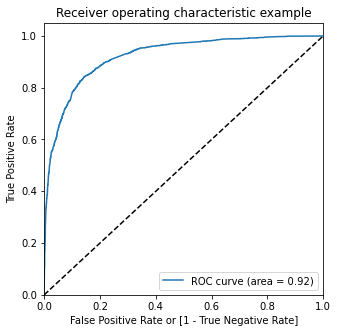

In [1189]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

ROC curve looks correct and area is good 0.92

## Step 11: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [1190]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Lead Number  Lead_Score  Predicted  0.0  0.1  \
0          0         0.199471         8425       19.95          0    1    1   
1          0         0.199471         8341       19.95          0    1    1   
2          0         0.016318         7376        1.63          0    1    0   
3          0         0.011105         7414        1.11          0    1    0   
4          1         0.985218         3521       98.52          1    1    1   

   0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0    0    0    0  
1    0    0    0    0    0    0    0    0  
2    0    0    0    0    0    0    0    0  
3    0    0    0    0    0    0    0    0  
4    1    1    1    1    1    1    1    1

In [1191]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378020  1.000000  0.000000
0.1   0.1  0.734091  0.962406  0.595329
0.2   0.2  0.816359  0.908104  0.760599
0.3   0.3  0.840518  0.858396  0.829652
0.4   0.4  0.852834  0.817878  0.874080
0.5   0.5  0.849834  0.749373  0.910891
0.6   0.6  0.844781  0.705096  0.929678
0.7   0.7  0.830412  0.628655  0.953034
0.8   0.8  0.814622  0.554302  0.972836
0.9   0.9  0.770251  0.412281  0.987814


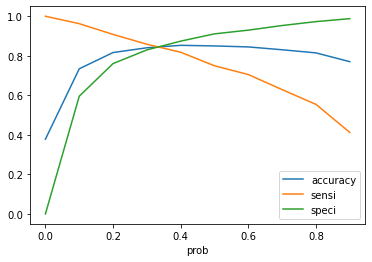

In [1192]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the above curves, 0.3 seems like a good probability cut off
#### Which means 30 is a good Lead Score for predicting lead conversions

## Step 12: Making predictions on the test set

In [1193]:
# transform the variables.
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [1194]:
X_test = X_test[col]
X_test.head()

Do Not Email  Total Time Spent on Website  Lead Origin_Lead Add Form  \
4462             0                    -0.878510                          0   
5243             0                    -0.582031                          0   
4597             0                    -0.086672                          0   
4680             0                    -0.878510                          1   
5355             0                    -0.878510                          0   

      Lead Origin_Lead Import  Lead Source_Olark Chat  \
4462                        0                       1   
5243                        0                       0   
4597                        0                       0   
4680                        0                       0   
5355                        0                       1   

      Lead Source_Welingak Website  Last Activity_SMS Sent  \
4462                             0                       1   
5243                             0                       0   
4597                             0                       0   
4680                             1                       1   
5355                             0                       0   

      What is your current occupation_Working Professional  \
4462                                                  0      
5243                                                  0      
4597                                                  0      
4680                                                  0      
5355                                                  0      

      Lead Quality_Might be  Lead Quality_Not Sure  Lead Quality_Worst  \
4462                      0                      0                   0   
5243                      0                      0                   1   
4597                      0                      0                   0   
4680                      0                      1                   0   
5355                      0                      1                   0   

      Last Notable Activity_Modified  \
4462                               0   
5243                               1   
4597                               1   
4680                               0   
5355                               1   

      Last Notable Activity_Olark Chat Conversation  \
4462                                              0   
5243                                              0   
4597                                              0   
4680                                              0   
5355                                              0   

      Last Notable Activity_Unreachable  
4462                                  0  
5243                                  0  
4597                                  0  
4680                                  0  
5355                                  0

In [1195]:
X_test_sm = sm.add_constant(X_test)

#### Predictions on the test set

In [1196]:
y_test_pred = res.predict(X_test_sm)

In [1197]:
y_test_pred[:10]

4462    0.959162
5243    0.003532
4597    0.548135
4680    0.995570
5355    0.084005
7071    0.034940
6314    0.698459
2688    0.999260
6228    0.019076
3014    0.080119
dtype: float64

In [1198]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
4462  0.959162
5243  0.003532
4597  0.548135
4680  0.995570
5355  0.084005

In [1199]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1200]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [1201]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1202]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1203]:
y_pred_final.head()

Converted  Lead Number         0
0          1         4462  0.959162
1          0         5243  0.003532
2          1         4597  0.548135
3          1         4680  0.995570
4          0         5355  0.084005

In [1204]:
# Renaming the column 0 to Conversion_Prob
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_prob'})

In [1205]:
y_pred_final.head()

Converted  Lead Number  Conversion_prob
0          1         4462         0.959162
1          0         5243         0.003532
2          1         4597         0.548135
3          1         4680         0.995570
4          0         5355         0.084005

In [1206]:
# Finding the Lead score
y_pred_final['Lead_Score'] = round(y_pred_final['Conversion_prob']*100, 2)
y_pred_final.head()

Converted  Lead Number  Conversion_prob  Lead_Score
0          1         4462         0.959162       95.92
1          0         5243         0.003532        0.35
2          1         4597         0.548135       54.81
3          1         4680         0.995570       99.56
4          0         5355         0.084005        8.40

In [1207]:
# Making predictions with the cut off Lead Score of 30
y_pred_final['final_predicted'] = y_pred_final.Lead_Score.map(lambda x: 1 if x > 30 else 0)
y_pred_final.head()

Converted  Lead Number  Conversion_prob  Lead_Score  final_predicted
0          1         4462         0.959162       95.92                1
1          0         5243         0.003532        0.35                0
2          1         4597         0.548135       54.81                1
3          1         4680         0.995570       99.56                1
4          0         5355         0.084005        8.40                0

In [1208]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8327808471454881

In [1209]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1381,  300],
       [ 154,  880]])

In [1210]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1211]:
# Let's see the sensitivity of our logistic regression model on test set
TP / float(TP+FN)

0.851063829787234

In [1212]:
# specificity
TN / float(TN+FP)

0.8215348007138608

We have a good model in the end

#### THE END